# SciPy - Library of scientific algorithms for Python

In [92]:
import matplotlib.pyplot as plt

import numpy as np
from scipy import linalg, sparse, optimize, interpolate, stats

## Linear algebra

The linear algebra module contains a lot of matrix related functions, including linear equation solving, eigenvalue solvers, matrix functions (for example matrix-exponentiation), a number of different decompositions (SVD, LU, cholesky), etc. 

Detailed documetation is available at: http://docs.scipy.org/doc/scipy/reference/linalg.html

Here we will look at how to use some of these functions:



### Linear equation systems

Linear equation systems on the matrix form

$A x = b$

where $A$ is a matrix and $x,b$ are vectors can be solved like:

In [93]:
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
b = np.array([1, 2, 3])

In [94]:
x = linalg.solve(A, b)
x

/var/folders/5j/6vs4zprx4fqcwl49nsw0hzqc0000gn/T/ipykernel_94802/2970524764.py:1: LinAlgWarning: Ill-conditioned matrix (rcond=2.20282e-18): result may not be accurate.
  x = linalg.solve(A, b)


array([-0.23333333,  0.46666667,  0.1       ])

In [95]:
# check
np.dot(A, x) - b

array([0., 0., 0.])

We can also do the same with

$A X = B$

where $A, B, X$ are matrices:

In [96]:
A = np.random.rand(3, 3)
B = np.random.rand(3, 3)

In [97]:
X = linalg.solve(A, B)

In [98]:
X

array([[ 0.50205743, -1.13583964, -1.86236558],
       [-0.16337836,  0.8428476 ,  0.67248023],
       [ 0.07450115,  1.91322538,  2.54705287]])

In [99]:
# check
linalg.norm(np.dot(A, X) - B)

3.0022746487098866e-16

### Eigenvalues and eigenvectors

The eigenvalue problem for a matrix $A$:

$\displaystyle A v_n = \lambda_n v_n$

where $v_n$ is the $n$th eigenvector and $\lambda_n$ is the $n$th eigenvalue.

To calculate eigenvalues of a matrix, use the `eigvals` and for calculating both eigenvalues and eigenvectors, use the function `eig`:

In [100]:
evals = linalg.eigvals(A)

In [101]:
evals

array([1.41224502+0.j        , 0.21949421+0.33855149j,
       0.21949421-0.33855149j])

In [102]:
evals, evecs = linalg.eig(A)

In [103]:
evals

array([1.41224502+0.j        , 0.21949421+0.33855149j,
       0.21949421-0.33855149j])

In [104]:
evecs

array([[-0.41685741+0.j       , -0.57640701+0.2712813j,
        -0.57640701-0.2712813j],
       [-0.38384996+0.j       , -0.16812613-0.3133156j,
        -0.16812613+0.3133156j],
       [-0.82394727+0.j       ,  0.68390669+0.j       ,
         0.68390669-0.j       ]])

The eigenvectors corresponding to the $n$th eigenvalue (stored in `evals[n]`) is the $n$th *column* in `evecs`, i.e., `evecs[:,n]`. To verify this, let's try mutiplying eigenvectors with the matrix and compare to the product of the eigenvector and the eigenvalue:

In [105]:
n = 1

linalg.norm(np.dot(A, evecs[:, n]) - evals[n] * evecs[:, n])

6.60471901297632e-16

There are also more specialized eigensolvers, like the `eigh` for Hermitian matrices. 

### Matrix operations

In [106]:
# the matrix inverse
linalg.inv(A)

array([[ 2.14935826, -3.13228084,  0.73005102],
       [ 0.73726175,  0.87070742, -0.44875782],
       [-1.96995618,  2.83373784,  0.38460166]])

In [107]:
# determinant
linalg.det(A)

0.22990617509821396

In [108]:
# norms of various orders
linalg.norm(A, ord=2), linalg.norm(A, ord=np.Inf)

(1.4628388255564089, 1.8541871368360108)

### Sparse matrices

Sparse matrices are often useful in numerical simulations dealing with large systems, if the problem can be described in matrix form where the matrices or vectors mostly contains zeros. Scipy has a good support for sparse matrices, with basic linear algebra operations (such as equation solving, eigenvalue calculations, etc.).

There are many possible strategies for storing sparse matrices in an efficient way. Some of the most common are the so-called coordinate form (COO), list of list (LIL) form,  and compressed-sparse column CSC (and row, CSR). Each format has some advantanges and disadvantages. Most computational algorithms (equation solving, matrix-matrix multiplication, etc.) can be efficiently implemented using CSR or CSC formats, but they are not so intuitive and not so easy to initialize. So often a sparse matrix is initially created in COO or LIL format (where we can efficiently add elements to the sparse matrix data), and then converted to CSC or CSR before used in real calculations.

For more information about these sparse formats, see e.g. http://en.wikipedia.org/wiki/Sparse_matrix

When we create a sparse matrix we have to choose which format it should be stored in. For example, 

In [109]:
# dense matrix
M = np.array([[1, 0, 0, 0], [0, 3, 0, 0], [0, 1, 1, 0], [1, 0, 0, 1]])
M

array([[1, 0, 0, 0],
       [0, 3, 0, 0],
       [0, 1, 1, 0],
       [1, 0, 0, 1]])

In [110]:
# convert from dense to sparse
A = sparse.csr_matrix(M)
A

<4x4 sparse matrix of type '<class 'numpy.int64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [111]:
# convert from sparse to dense
A.todense()

matrix([[1, 0, 0, 0],
        [0, 3, 0, 0],
        [0, 1, 1, 0],
        [1, 0, 0, 1]])

More efficient way to create sparse matrices: create an empty matrix and populate with using matrix indexing (avoids creating a potentially large dense matrix)

In [112]:
A = sparse.lil_matrix((4, 4))  # empty 4x4 sparse matrix
A[0, 0] = 1
A[1, 1] = 3
A[2, 2] = A[2, 1] = 1
A[3, 3] = A[3, 0] = 1
A

<4x4 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in List of Lists format>

In [113]:
A.todense()

matrix([[1., 0., 0., 0.],
        [0., 3., 0., 0.],
        [0., 1., 1., 0.],
        [1., 0., 0., 1.]])

Converting between different sparse matrix formats:

In [114]:
A

<4x4 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in List of Lists format>

In [115]:
A = sparse.csr_matrix(A)
A

<4x4 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [116]:
A = sparse.csc_matrix(A)
A

<4x4 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Column format>

We can compute with sparse matrices like with dense matrices:

In [117]:
A.todense()

matrix([[1., 0., 0., 0.],
        [0., 3., 0., 0.],
        [0., 1., 1., 0.],
        [1., 0., 0., 1.]])

In [118]:
(A * A).todense()

matrix([[1., 0., 0., 0.],
        [0., 9., 0., 0.],
        [0., 4., 1., 0.],
        [2., 0., 0., 1.]])

In [119]:
A.todense()

matrix([[1., 0., 0., 0.],
        [0., 3., 0., 0.],
        [0., 1., 1., 0.],
        [1., 0., 0., 1.]])

In [120]:
A.dot(A).todense()

matrix([[1., 0., 0., 0.],
        [0., 9., 0., 0.],
        [0., 4., 1., 0.],
        [2., 0., 0., 1.]])

In [122]:
v = np.array([1, 2, 3, 4])[:, np.newaxis]
v

array([[1],
       [2],
       [3],
       [4]])

In [123]:
# sparse matrix - dense vector multiplication
A * v

array([[1.],
       [6.],
       [5.],
       [5.]])

In [124]:
# same result with dense matrix - dense vector multiplcation
A.todense() * v

matrix([[1.],
        [6.],
        [5.],
        [5.]])

## Optimization

Optimization (finding minima or maxima of a function) is a large field in mathematics, and optimization of complicated functions or in many variables can be rather involved. Here we will only look at a few very simple cases. For a more detailed introduction to optimization with SciPy see: http://scipy-lectures.github.com/advanced/mathematical_optimization/index.html

To use the optimization module in scipy first include the `optimize` module:

### Finding a minima

Let's first look at how to find the minima of a simple function of a single variable:

In [125]:
def f(x):
    return 4 * x**3 + (x - 2) ** 2 + x**4

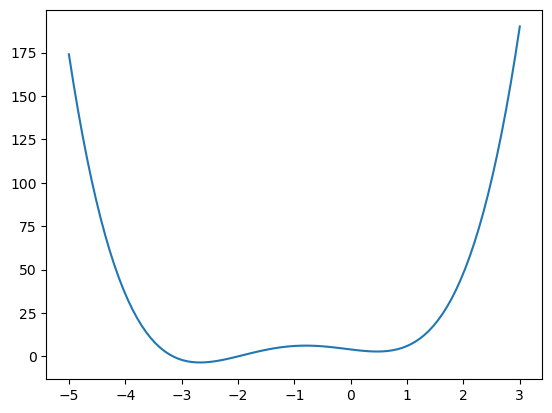

In [126]:
fig, ax = plt.subplots()
x = np.linspace(-5, 3, 100)
ax.plot(x, f(x))

We can use the `fmin_bfgs` function to find the minima of a function:

In [127]:
x_min = optimize.fmin_bfgs(f, -2)
x_min

Optimization terminated successfully.
         Current function value: -3.506641
         Iterations: 5
         Function evaluations: 16
         Gradient evaluations: 8


array([-2.67298151])

In [128]:
optimize.fmin_bfgs(f, 0.5)

Optimization terminated successfully.
         Current function value: 2.804988
         Iterations: 3
         Function evaluations: 10
         Gradient evaluations: 5


array([0.46961745])

We can also use the `brent` or `fminbound` functions. They have a bit different syntax and use different algorithms. 

In [129]:
optimize.brent(f)

0.46961743402759754

In [130]:
optimize.fminbound(f, -4, 2)

-2.6729822917513886

### Finding a solution to a function

To find the root for a function of the form $f(x) = 0$ we can use the `fsolve` function. It requires an initial guess: 

In [131]:
omega_c = 3.0


def f(omega):
    # a transcendental equation: resonance frequencies of a low-Q SQUID terminated microwave resonator
    return np.tan(2 * np.pi * omega) - omega_c / omega

/var/folders/5j/6vs4zprx4fqcwl49nsw0hzqc0000gn/T/ipykernel_94802/2917072861.py:6: RuntimeWarning: divide by zero encountered in true_divide
  return np.tan(2 * np.pi * omega) - omega_c / omega


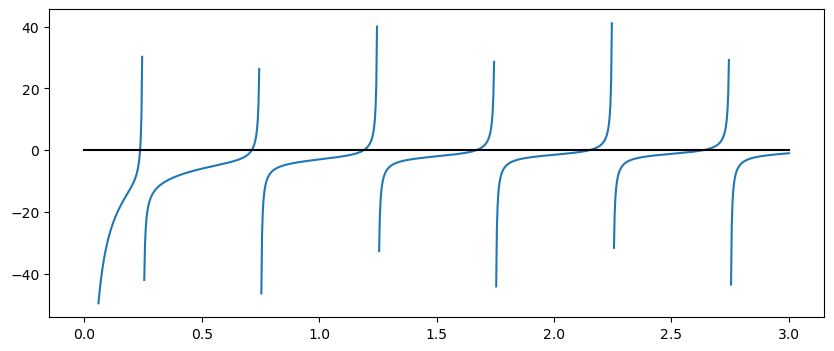

In [132]:
fig, ax = plt.subplots(figsize=(10, 4))
x = np.linspace(0, 3, 1000)
y = f(x)
mask = np.where(abs(y) > 50)
x[mask] = y[mask] = np.NaN  # get rid of vertical line when the function flip sign
ax.plot(x, y)
ax.plot([0, 3], [0, 0], "k")

In [133]:
optimize.fsolve(f, 0.1)

array([0.23743014])

In [134]:
optimize.fsolve(f, 0.6)

array([0.71286972])

In [135]:
optimize.fsolve(f, 1.1)

array([1.18990285])

## Interpolation

Interpolation is simple and convenient in scipy: The `interp1d` function, when given arrays describing X and Y data, returns and object that behaves like a function that can be called for an arbitrary value of x (in the range covered by X), and it returns the corresponding interpolated y value:

In [136]:
def f(x):
    return np.sin(x)

In [137]:
n = np.arange(0, 10)
x = np.linspace(0, 9, 100)

y_meas = f(n) + 0.1 * np.random.randn(len(n))  # simulate measurement with noise
y_real = f(x)

linear_interpolation = interpolate.interp1d(n, y_meas)
y_interp1 = linear_interpolation(x)

cubic_interpolation = interpolate.interp1d(n, y_meas, kind="cubic")
y_interp2 = cubic_interpolation(x)

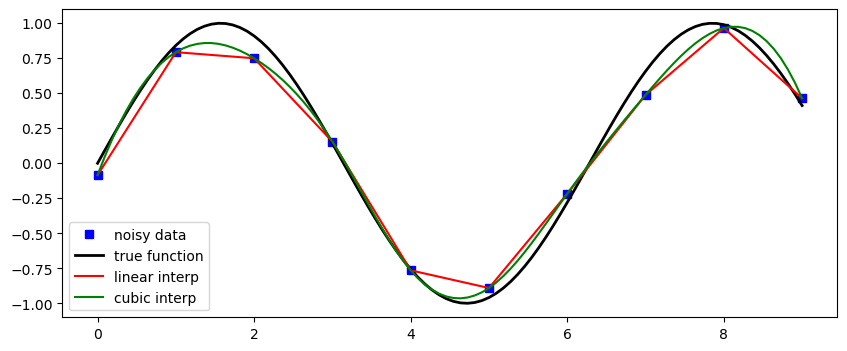

In [138]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(n, y_meas, "bs", label="noisy data")
ax.plot(x, y_real, "k", lw=2, label="true function")
ax.plot(x, y_interp1, "r", label="linear interp")
ax.plot(x, y_interp2, "g", label="cubic interp")
ax.legend(loc=3)

## Statistics

The `scipy.stats` module contains a large number of statistical distributions, statistical functions and tests. For a complete documentation of its features, see http://docs.scipy.org/doc/scipy/reference/stats.html.

There is also a very powerful python package for statistical modelling called statsmodels. See http://statsmodels.sourceforge.net for more details.

In [139]:
# create a (discrete) random variable with Poissonian distribution

X = stats.poisson(3.5)  # photon distribution for a coherent state with n=3.5 photons

(array([ 43.,  93., 197., 208., 194., 136.,  82.,  27.,  14.,   6.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

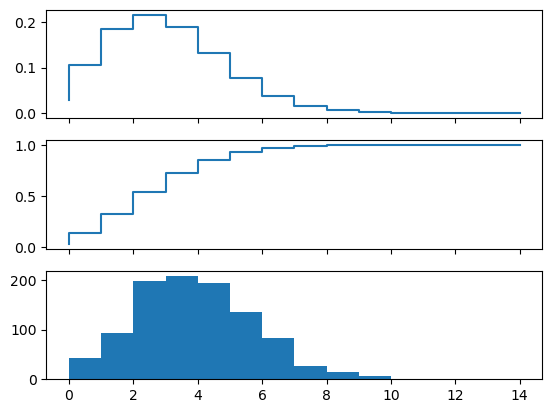

In [140]:
n = np.arange(0, 15)

fig, axes = plt.subplots(3, 1, sharex=True)

# plot the probability mass function (PMF)
axes[0].step(n, X.pmf(n))

# plot the cumulative distribution function (CDF)
axes[1].step(n, X.cdf(n))

# plot histogram of 1000 random realizations of the stochastic variable X
axes[2].hist(X.rvs(size=1000))

In [141]:
# create a (continous) random variable with normal distribution
Y = stats.norm()

(array([ 2.,  0.,  0.,  1.,  3.,  3.,  2.,  6., 12.,  9., 10., 14., 14.,
        17., 24., 24., 30., 32., 32., 45., 50., 44., 44., 40., 46., 51.,
        41., 41., 46., 41., 41., 35., 30., 32., 24., 20., 17., 12., 11.,
        12., 11., 12.,  5.,  3.,  1.,  5.,  2.,  2.,  0.,  1.]),
 array([-2.90088333, -2.78181186, -2.66274039, -2.54366893, -2.42459746,
        -2.30552599, -2.18645452, -2.06738305, -1.94831158, -1.82924012,
        -1.71016865, -1.59109718, -1.47202571, -1.35295424, -1.23388277,
        -1.11481131, -0.99573984, -0.87666837, -0.7575969 , -0.63852543,
        -0.51945396, -0.4003825 , -0.28131103, -0.16223956, -0.04316809,
         0.07590338,  0.19497485,  0.31404631,  0.43311778,  0.55218925,
         0.67126072,  0.79033219,  0.90940366,  1.02847512,  1.14754659,
         1.26661806,  1.38568953,  1.504761  ,  1.62383247,  1.74290393,
         1.8619754 ,  1.98104687,  2.10011834,  2.21918981,  2.33826128,
         2.45733274,  2.57640421,  2.69547568,  2.81454715,

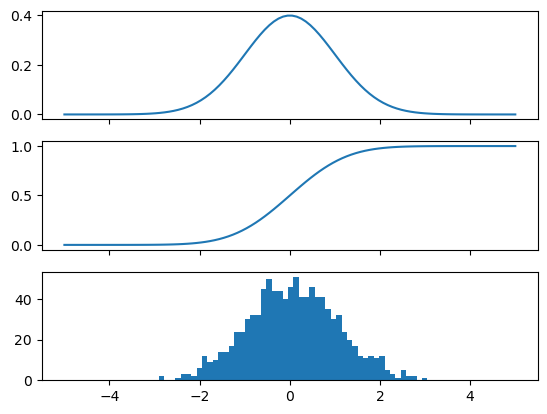

In [142]:
x = np.linspace(-5, 5, 100)

fig, axes = plt.subplots(3, 1, sharex=True)

# plot the probability distribution function (PDF)
axes[0].plot(x, Y.pdf(x))

# plot the cumulative distribution function (CDF)
axes[1].plot(x, Y.cdf(x))

# plot histogram of 1000 random realizations of the stochastic variable Y
axes[2].hist(Y.rvs(size=1000), bins=50)

Statistics:

In [143]:
X.mean(), X.std(), X.var()  # Poisson distribution

(3.5, 1.8708286933869707, 3.5)

In [144]:
Y.mean(), Y.std(), Y.var()  # normal distribution

(0.0, 1.0, 1.0)

### Statistical tests

Test if two sets of (independent) random data come from the same distribution:

In [145]:
t_statistic, p_value = stats.ttest_ind(X.rvs(size=1000), X.rvs(size=1000))

print("t-statistic =", t_statistic)
print("p-value =", p_value)

t-statistic = 1.3455606887538667
p-value = 0.17859691207617698


Since the p value is very large we cannot reject the hypothesis that the two sets of random data have *different* means.

To test if the mean of a single sample of data has mean 0.1 (the true mean is 0.0):

In [146]:
stats.ttest_1samp(Y.rvs(size=1000), 0.1)

TtestResult(statistic=-2.4088049863698657, pvalue=0.01618500697292194, df=999)

Low p-value means that we can reject the hypothesis that the mean of Y is 0.1.

In [147]:
Y.mean()

0.0

In [148]:
stats.ttest_1samp(Y.rvs(size=1000), Y.mean())

TtestResult(statistic=0.18776106915233173, pvalue=0.8511020842872594, df=999)